<a href="https://colab.research.google.com/github/moonwalker199/DAI-101/blob/main/assignment2_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>DAI-101 Assignment 2 <br><h2>

**Submitted by Debangan Sarkar <br>
23117043, Mechanical Engineering (ME-2)**


To enhance restaurants' understanding of tipping behavior, helping tailor services
and optimize operations develop a predictive model to estimate tip amounts in
restaurants based on customer billing and demographic details

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df = pd.read_csv('tips (data for regression problem).csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [38]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [39]:
# Check for missing values
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


No missing values :)


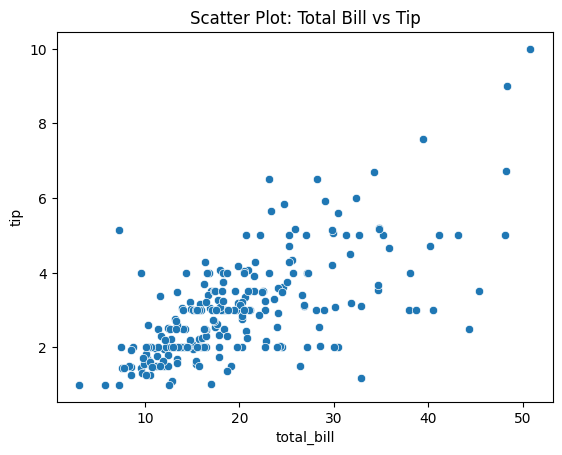

In [40]:
# Scatter Plot
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

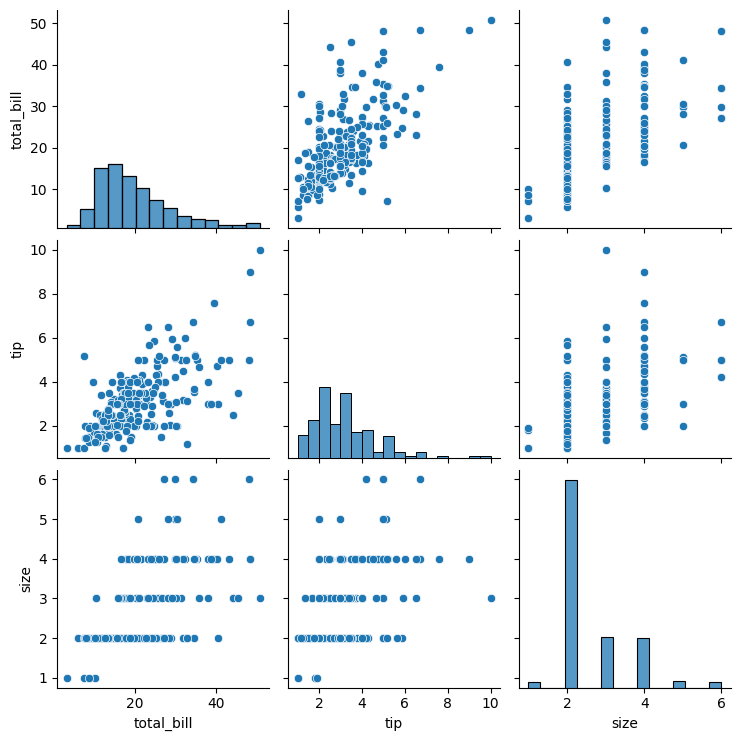

In [60]:
# Pair Plot
sns.pairplot(df)
plt.grid(True)
plt.show()

In [42]:
data_encoded = pd.get_dummies(df, drop_first=True)

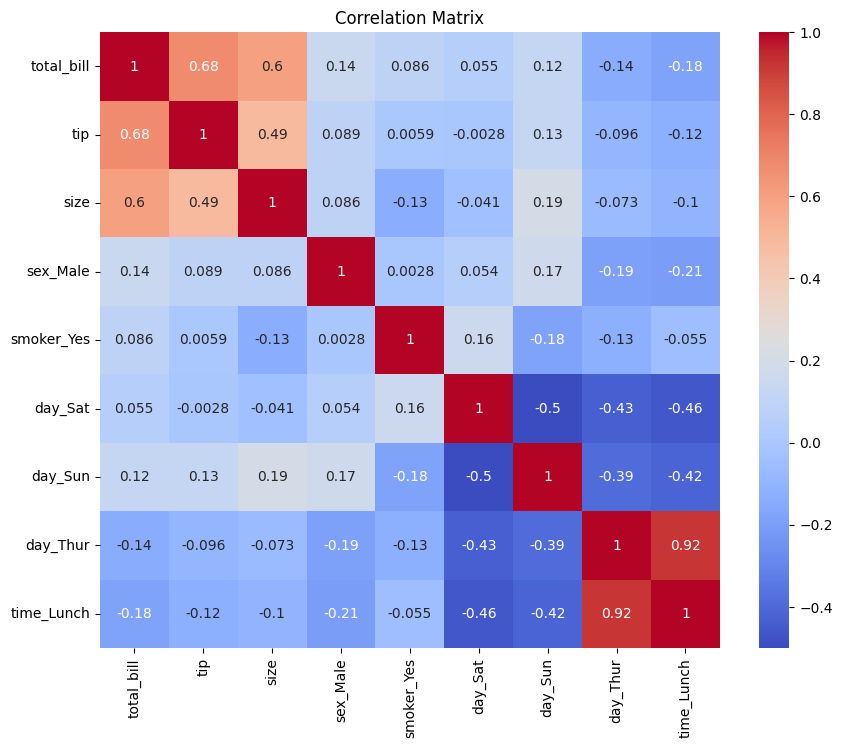

In [43]:
#correlation matrix on the encoded data
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
# Rainbow Test for Linearity
X = df[['total_bill', 'size']]  #predictor columns
X = sm.add_constant(X)
y = df['tip']
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow test statistic:", rainbow_statistic)
print("Rainbow test p-value:", rainbow_p_value)

Rainbow test statistic: 1.1902656646832817
Rainbow test p-value: 0.17048935693447634


In [63]:
# Residuals Plot
sns.residplot(x=model.predict(X), y=y, lowess=True)
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

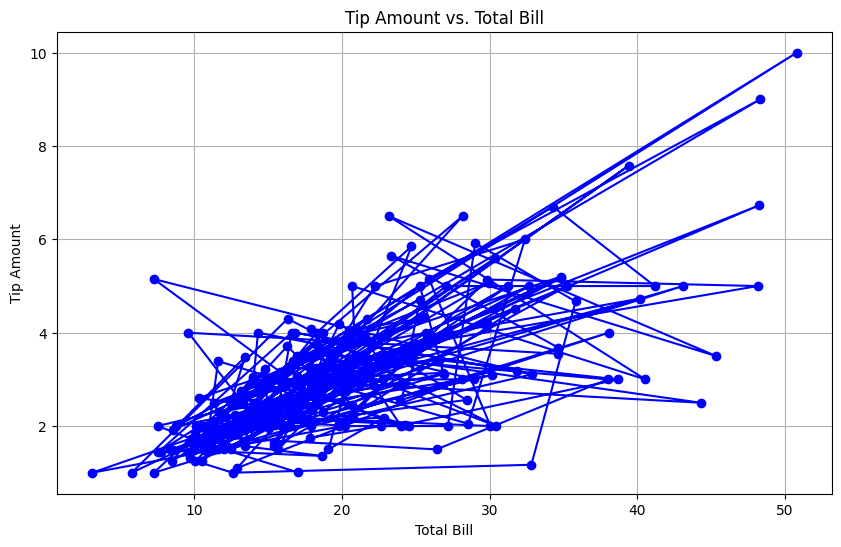

In [59]:
x = df['total_bill']
y = df['tip']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='b', marker='o', linestyle='-')  # Customize line color, marker, and style as needed

# Add title and labels
plt.title("Tip Amount vs. Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.grid(True)  # Add grid for readability

# Show the plot
plt.show()


MODEL BUILDING

In [47]:
# Split data into train and test sets
X = df[['total_bill', 'size']]  # Features
y = df['tip']  # Target variable

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Define function to evaluate models
def model_eval(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

In [65]:
# Linear Regression
lin_reg = LinearRegression().fit(X_train, y_train)
lin_mae, lin_mse, lin_r2 = model_eval(lin_reg, X_test, y_test)
print(f"Linear Regression: MAE={lin_mae}, MSE={lin_mse}, R2={lin_r2}")

Linear Regression: MAE=0.6639235737596483, MSE=0.6485996190543516, R2=0.4811084097989491


In [66]:
# Ridge Regression
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
ridge_mae, ridge_mse, ridge_r2 = model_eval(ridge, X_test, y_test)
print(f"Ridge Regression: MAE={ridge_mae}, MSE={ridge_mse}, R2={ridge_r2}")

Ridge Regression: MAE=0.6635062841685714, MSE=0.647631556791715, R2=0.4818828773627838


In [67]:
# Lasso Regression
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
lasso_mae, lasso_mse, lasso_r2 = model_eval(lasso, X_test, y_test)
print(f"Lasso Regression: MAE={lasso_mae}, MSE={lasso_mse}, R2={lasso_r2}")

Lasso Regression: MAE=0.6374841046500827, MSE=0.5908528649971524, R2=0.5273068720881755


In [68]:
# Decision Tree Regression
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_mae, tree_mse, tree_r2 = model_eval(tree, X_test, y_test)
print(f"Decision Tree: MAE={tree_mae}, MSE={tree_mse}, R2={tree_r2}")

Decision Tree: MAE=0.8212244897959182, MSE=1.0119673469387755, R2=0.1904075635286533


In [69]:
# Random Forest Regression
forest = RandomForestRegressor().fit(X_train, y_train)
forest_mae, forest_mse, forest_r2 = model_eval(forest, X_test, y_test)
print(f"Random Forest: MAE={forest_mae}, MSE={forest_mse}, R2={forest_r2}")

Random Forest: MAE=0.7254510204081632, MSE=0.7721789013378695, R2=0.38224271759658346


In [70]:
# Support Vector Regression
svr = SVR(kernel='linear').fit(X_train, y_train)
svr_mae, svr_mse, svr_r2 = model_eval(svr, X_test, y_test)
print(f"Support Vector Regression: MAE={svr_mae}, MSE={svr_mse}, R2={svr_r2}")

Support Vector Regression: MAE=0.6726126897614966, MSE=0.689700910385633, R2=0.4482266229590187


In [71]:
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor().fit(X_train, y_train)
knn_mae, knn_mse, knn_r2 = model_eval(knn, X_test, y_test)
print(f"K-Nearest Neighbors: MAE={knn_mae}, MSE={knn_mse}, R2={knn_r2}")

K-Nearest Neighbors: MAE=0.7170612244897958, MSE=0.7394298775510204, R2=0.40844253722501


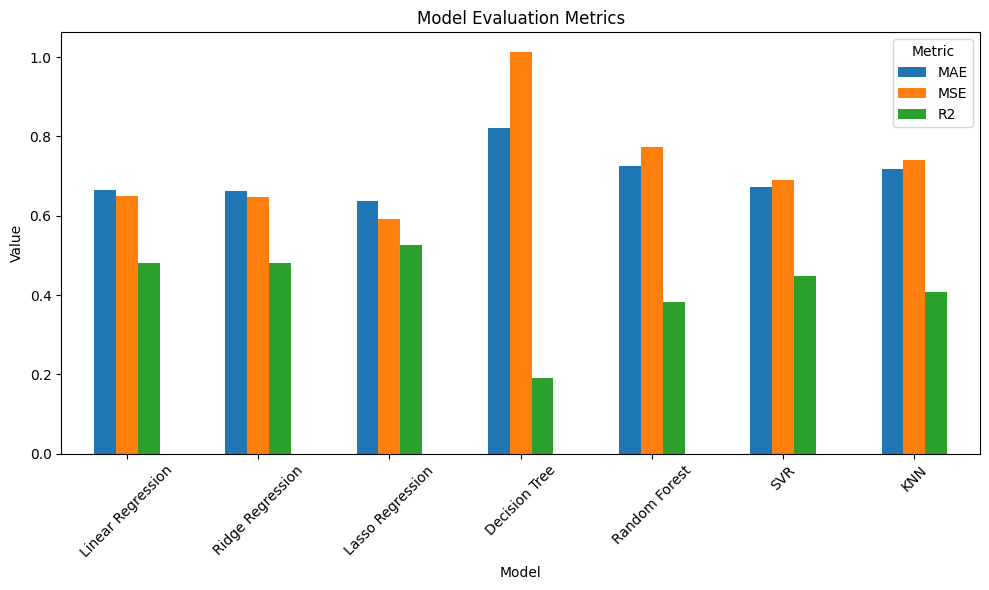

In [80]:
metrics = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN'],
    'MAE': [lin_mae, ridge_mae, lasso_mae, tree_mae, forest_mae, svr_mae, knn_mae],
    'MSE': [lin_mse, ridge_mse, lasso_mse, tree_mse, forest_mse, svr_mse, knn_mse],
    'R2': [lin_r2, ridge_r2, lasso_r2, tree_r2, forest_r2, svr_r2, knn_r2]
}

metrics_df = pd.DataFrame(metrics)

metrics_df = metrics_df.set_index('Model')

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [74]:
def display_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'coef_'):
        print(f"\n{model_name} Coefficients:")
        coef = model.coef_
        for feature, importance in zip(feature_names, coef):
            print(f"{feature}: {importance:.4f}")
    elif hasattr(model, 'feature_importances_'):
        print(f"\n{model_name} Feature Importances:")
        importances = model.feature_importances_
        for feature, importance in zip(feature_names, importances):
            print(f"{feature}: {importance:.4f}")


display_feature_importance(lasso, 'Lasso Regression', X.columns)
display_feature_importance(ridge, 'Ridge Regression', X.columns)
display_feature_importance(tree, 'Decision Tree', X.columns)
display_feature_importance(forest, 'Random Forest', X.columns)


Lasso Regression Coefficients:
total_bill: 0.0991
size: 0.1081

Ridge Regression Coefficients:
total_bill: 0.0910
size: 0.2628

Decision Tree Feature Importances:
total_bill: 0.9164
size: 0.0836

Random Forest Feature Importances:
total_bill: 0.8984
size: 0.1016


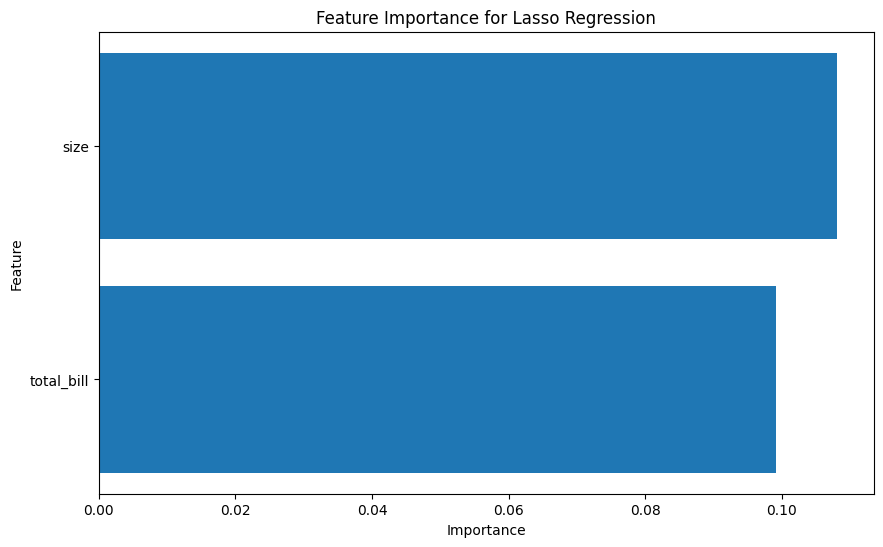

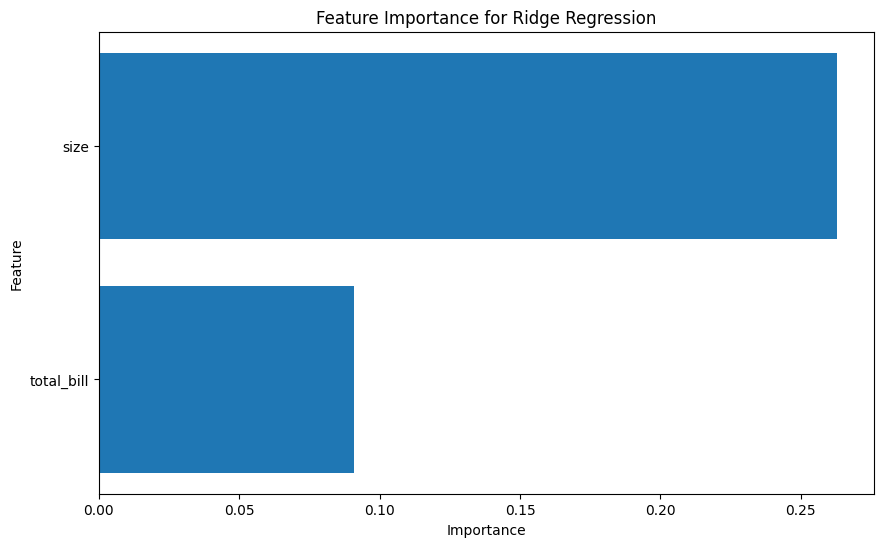

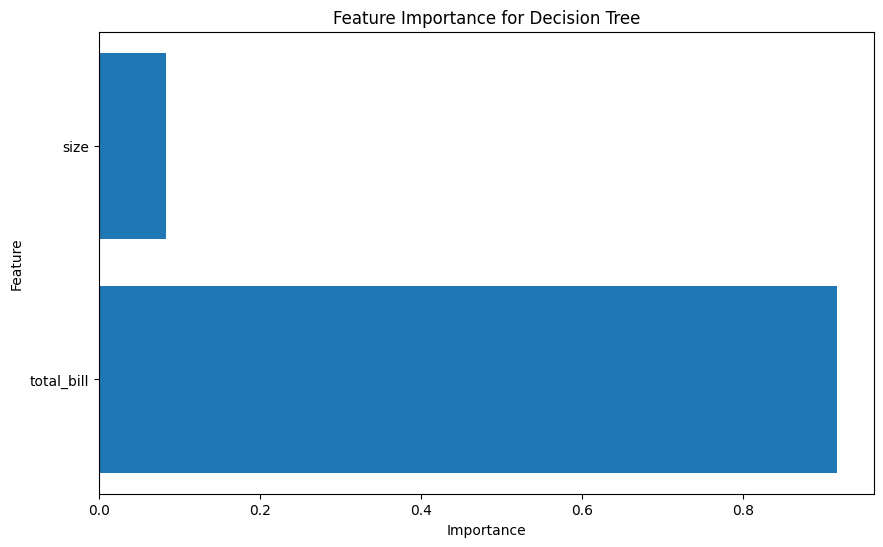

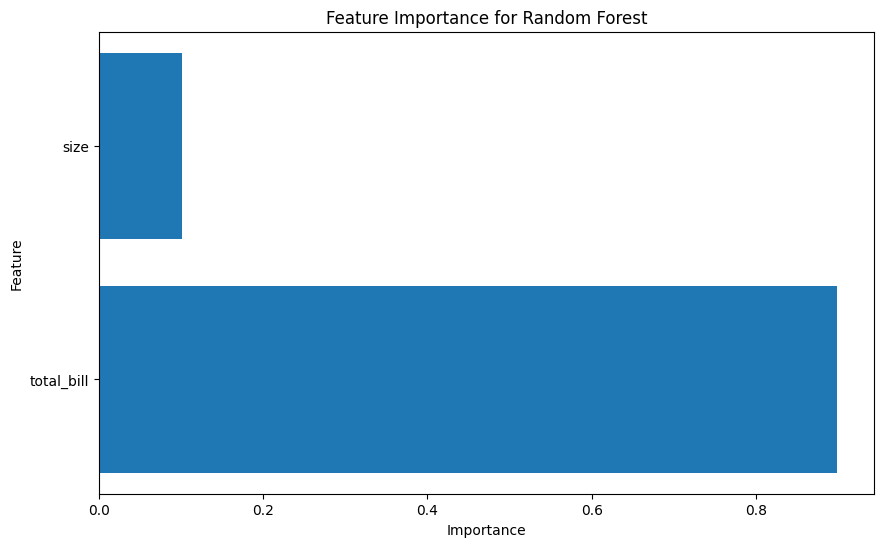

In [79]:
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'coef_'):
        importances = model.coef_

        return

    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance for {model_name}")
    plt.show()

plot_feature_importance(lasso, 'Lasso Regression', X.columns)
plot_feature_importance(ridge, 'Ridge Regression', X.columns)
plot_feature_importance(tree, 'Decision Tree', X.columns)
plot_feature_importance(forest, 'Random Forest', X.columns)

#Insights for Management
Using results from the best-performing model to suggest actionable insights.

Tip Influences: <br>
For example, higher bills may generally lead to higher tips, but a customer’s group size could affect tipping behavior.

In [82]:
feature = forest.feature_importances_
for i, v in enumerate(X.columns):
    print(f"{v}: {feature[i]}")



total_bill: 0.8983734881575834
size: 0.10162651184241658
